In [1]:
import numpy as np
from numpy import linalg as la
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 10

We define two functions. One builds Gaussian states from $n$ and $r$ and the other builds Gaussian measurements from $n$.

They are obtained first by building the matrix of, respectively, the discrete annihilation and the discrete position operators, then by seeking their eigenvectors.

In [2]:
# Here, J_x is in fact 2*J_x and J_y is in fact 2*i*P_n= -2*i*J_y
def make_states(n,r) :
    vv=[]


    alpha=np.sqrt(1-np.exp(-4*r))
    a = n/2*(n/2 +1)

    J_x = np.zeros((n+1,n+1))
    J_y = np.zeros((n+1,n+1))
    
    # Values at the boundaries are defined :
    
    J_x[0,1]=np.sqrt(a+n/2*(-n/2+1))
    J_x[n,n-1]=np.sqrt(a-n/2*(n/2-1))
    J_y[0,1]= np.sqrt(a+n/2*(-n/2+1))
    J_y[n,n-1]=- np.sqrt(a-n/2*(n/2-1))
    
    # Other values within the matrices are defined :
    
    i=-n/2+1

    while i<=n/2-1 :
        if a-i*(i+1) >= 0 :
            high=np.sqrt(a-i*(i+1))
        if a-i*(i-1) >= 0 :
            low=np.sqrt(a-i*(i-1))
            
        J_x[i+n/2,i+n/2+1] = high
        J_x[i+n/2,i+n/2-1] = low
        J_y[i+n/2,i+n/2+1] =  high
        J_y[i+n/2,i+n/2-1] = - low
        i+=1
    
    # We write the operator which has eigenvalues x. We call it Anni, short for Annihilation despite it not being exactly the
    # annihilation operator :
    
    Anni=(alpha**(-1))*(J_x/(np.sqrt(n)) + np.exp(-2*r) *J_y/(np.sqrt(n)))/2
    
    # We take eigenvalues and eigenvectors :
    
    w, v = la.eig(Anni) 

    k=0
    while k<n+1 :
        vv.append(v[:,k])
        k+=1
        
    # np.eig puts elements of an eigenvector in columns.
    # The loop above builds the eigenvectors by putting elements of the same eigenvector in a row. 
    # This will be easier to manipulate.

    return w,vv 

# This function outputs the eigenvalues corresponding to the set of inputs 
# and the eigenvectors corresponding to the Gaussian states.

In [3]:
# Here, J_x is in fact 2*J_x.

# The principle behind the code below is exactly that of the one above.

def make_meas(n) :
    vv=[]
    a = n/2*(n/2 +1)

    J_x = np.zeros((n+1,n+1))
    J_x[0,1]=np.sqrt(a+n/2*(-n/2+1))
    J_x[n,n-1]=np.sqrt(a-n/2*(n/2-1))
    i=-n/2+1

    while i<=n/2-1 :
        if a-i*(i+1) >= 0 :
            high=np.sqrt(a-i*(i+1))
        if a-i*(i-1) >= 0 :
            low=np.sqrt(a-i*(i-1))
    
        J_x[i+n/2,i+n/2+1] = high
        J_x[i+n/2,i+n/2-1] = low
        i+=1
    
    X_n=J_x/(2*np.sqrt(n))
    s,t  = la.eig(X_n)
    k=0
    while k<n+1 :
        vv.append(t[:,k])
        k+=1

    return s,vv

# This function outputs the eigenvalues corresponding to the set of outputs 
# and the eigenvectors corresponding to the Gaussian measurements.
    

We select specific values for $q$, the number of qubits (which is the number of inputs and outputs minus $1$ : $q=n-1$) and for $r$, the positive squeezing parameter.

In [4]:
q=1
r=0.015

In [5]:
a=make_states(q, r)[1]

In [6]:
b=make_meas(q)[1]

In [143]:
np.dot(a,b)

array([[ 0.61590573,  0.78781986],
       [-0.78781986, -0.61590573]])

In [145]:
print(make_states(q, r)[0])
print(a)

[ 0.5 -0.5]
[array([ 0.99258388,  0.12156164]), array([-0.99258388,  0.12156164])]


In [146]:
print(make_meas(q)[0])
print(b)

[ 0.5 -0.5]
[array([ 0.70710678,  0.70710678]), array([-0.70710678,  0.70710678])]


We obtain the probabbilities associated to $x$ and $y$ by apply states $|{\Psi_x}>$ to measurements to obtain $P(x,y) = |<{\Psi_x}| y>|^{ 2} $.

We define a function which builds the probability matrix from states and measurements.


In [196]:
def make_prob_matrix(state,meas) :
    i=0
    p_m=np.ones((len(state),len(meas)))
    while i<len(state) :
        j=0
        while j<len(meas) :
            state_meas = abs(sum(state[i]*meas[j]))
            p=state_meas**2
            p_m[i][j]=p
            j+=1
        i+=1
        
    
    return p_m
    

In [199]:
p=make_prob_matrix(a,b)

In [200]:
print('Gaussian Probability Matrix :')
print()
print(p)

Gaussian Probability Matrix :

[[ 0.62066013  0.37933987]
 [ 0.37933987  0.62066013]]


We build a function we call 'verify' to check that is is indeed a 'probability matrix' (i.e. : that the elements of any line of the matrix sum to 1). 

This will not be needed in the future but is just set as a safety net.

In [201]:
def verify(p) :
    
    i=0
    indic=0
    while i<len(p) :
        s=np.sum(p[i])
        if not 0.999<s<1.001 :
            indic+=1  
        
        i+=1
    if indic==0 :
        print('verified')
    else :
        print('not a probability matrix')

In [202]:
verify([[1,2],[3,4]])

not a probability matrix


In [203]:
verify(p)

verified


We have reviewed all steps allowing us to define a function which builds the discrete version of $f$ from values of $q$ and $r$ and from two positive integers which are positions in the probability matrix (going from $0$ to $q$), corresponding to an input $x$ (line number) and an output $y$ (column number). The function  prints the values of $x$ and $y$ and returns the value of $f$ obtained from these.

In [492]:
def build_f(q,r,i,j) :
    
    c=make_states(q,r)[1] # builds states 
    d=make_meas(q)[1] # builds measurements
    
    p = make_prob_matrix(c,d) # builds a probability matrix from states and measurements

    x= make_states(q,r)[0][i] # gets input value from line number in probability matrix
    y=make_meas(q)[0][j] # gets output value from column number in probability matrix
    
    # The rest builds f :
    
    a = q/2*(q/2 +1)
    
    if i == 0 :
        f= np.sqrt(a-x*(x-1))*np.sqrt(p[i+1][j]/p[i][j])
    elif i+1==len(p) :
        f= np.sqrt(a-x*(x+1))*np.sqrt(p[i-1][j]/p[i][j])
    else :
        f=np.sqrt(a-x*(x+1))*np.sqrt(p[i-1][j]/p[i][j]) + np.sqrt(a-x*(x-1))*np.sqrt(p[i+1][j]/p[i][j])
    
    #print('x=',x)
    #print('y=',y)
    #print(p[i][j]) 

    
    return (-f+q)/2
    
    

In [493]:
f_m=np.ones((2,2))
i=0
while i<2 :
    j=0
    while j<2 :
        f_m[i][j]=build_f(1,0.001,i,j)
        j+=1
    i+=1   

In [494]:
f_m

array([[ 0.03065343, -0.03265543],
       [-0.03265543,  0.03065343]])

## n=2 case

We treat the $n=2$ case by comparing the values of $<f>$ for the best injective strategy (BIS) and the best non-injective strategy (BNIS). The code below computes the mean value for $f$ for $n=2$ over a range of $r$ values for a given probability of the input $0.5$.

It also computes the values of $<f>$ in the quantum gaussian case (QTM).

In [532]:
def make_f_mean(P) :
    r=0.001
    listr=[] # r values
    one=[] # <f> for BIS 
    two=[] # <f> for BNIS 
    three=[] # <f> for QTM bound
    
    while r < 1 :
        listr.append(r)
        c=make_states(q,r)[1] # builds states 
        d=make_meas(q)[1] # builds measurements
        m = make_prob_matrix(c,d) # builds a probability matrix from states and measurements
        
        monevalue=P*build_f(q,r,1,1) + (1-P)*build_f(q,r,0,0)
        one.append(monevalue)
        
        mvalue = P*build_f(q,r,0,1) + (1-P)*build_f(q,r,1,1)
        two.append(mvalue)

        mean=P*(m[0][0]*build_f(q,r,0,0) + m[0][1]*build_f(q,r,0,1)) + (1-P)*(m[1][1]*build_f(q,r,1,1) + m[1][0]*build_f(q,r,1,0))
        three.append(mean) 
        #print(monevalue,mvalue,mean)
        r=r+0.005
    return listr,one,two,three
    

In the $n=2$ case, the gaussian distribution of inputs is uniform, so that both probabilities of input are set to $1/2$.

In [533]:
p=1/2
n=100

In [534]:
r_list=make_f_mean(p)[0]
bis=make_f_mean(p)[1]
bnis=make_f_mean(p)[2]
qtm=make_f_mean(p)[3]

We compare the mean values of $f$ yielded by the classical strategies and the quantum (gaussian) one :

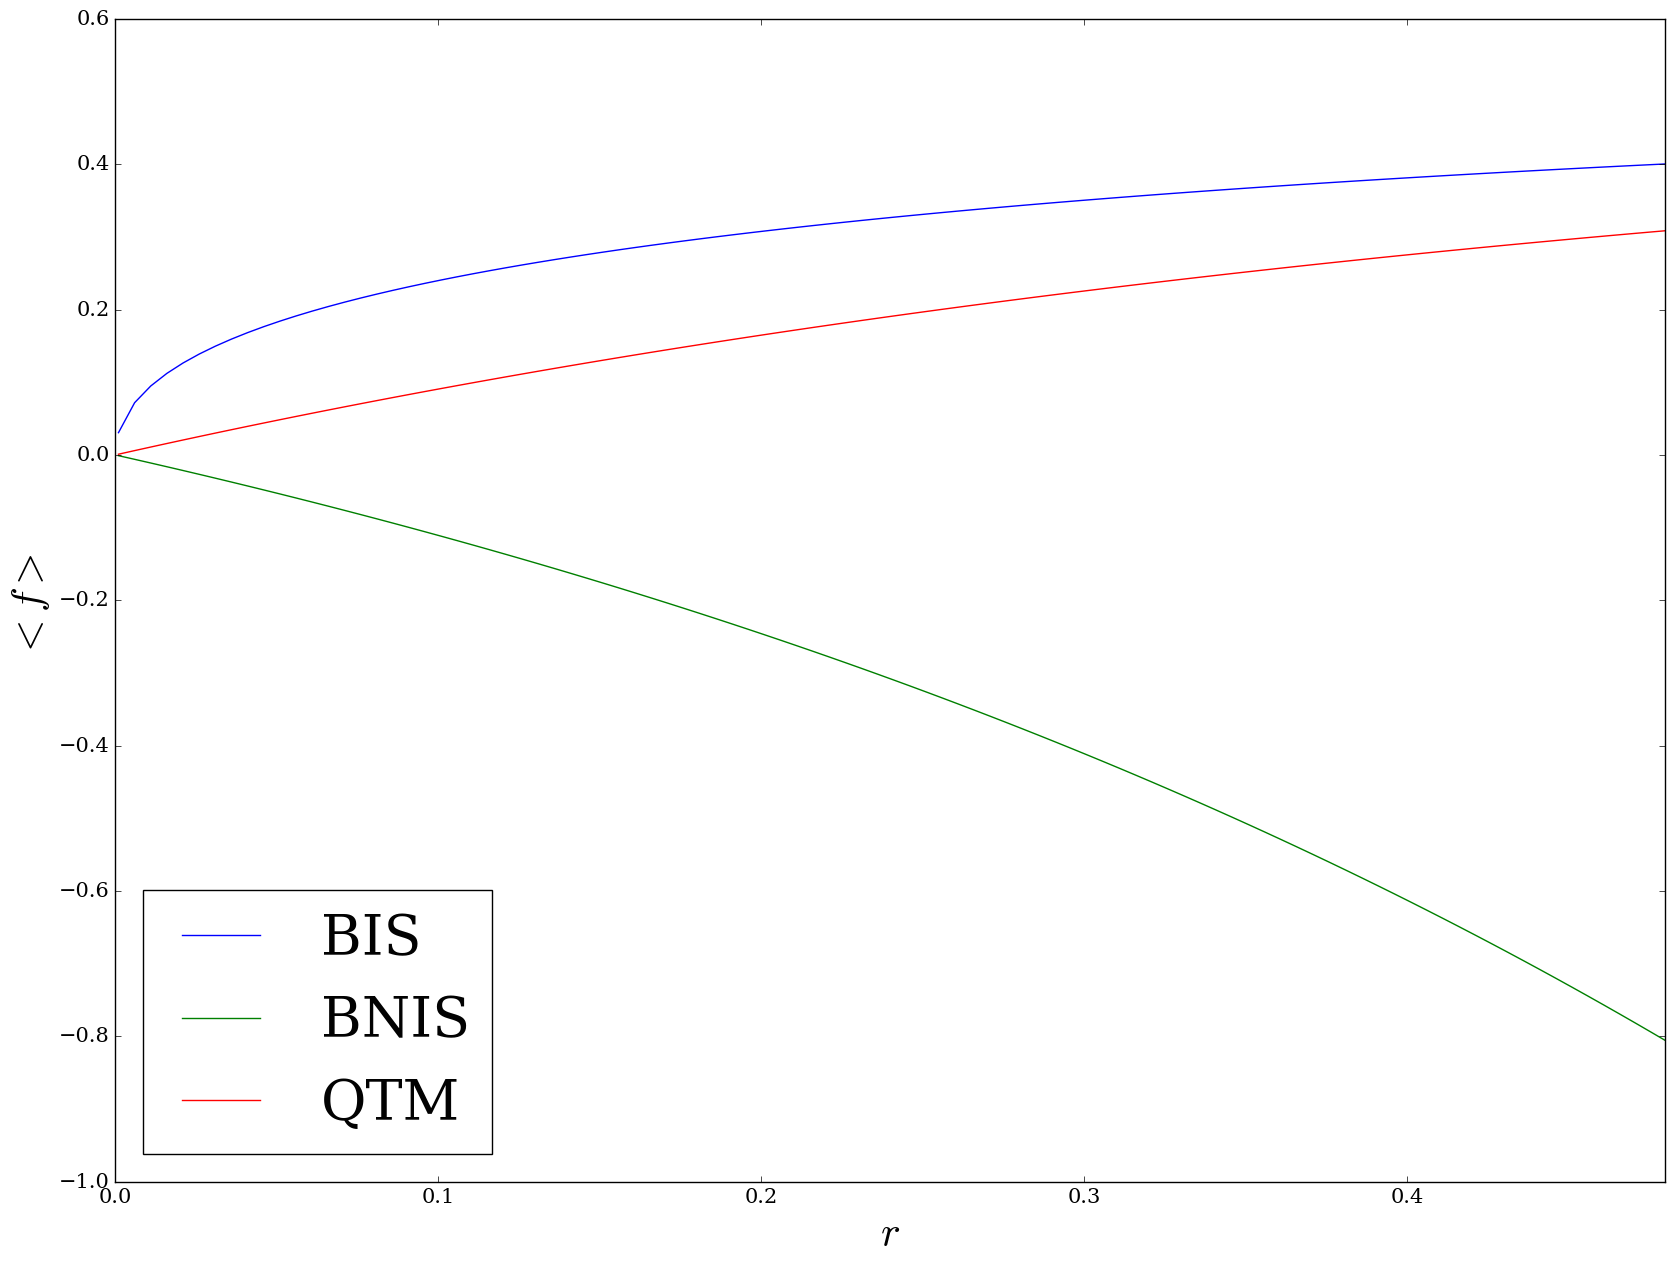

In [564]:
plt.figure(figsize=(20, 15))
#plt.suptitle('Comparing BIS, BNIS and QTM', fontsize=20)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)
plt.axis(xmax=0.48)
plt.xlabel('$r$', fontsize=30)
plt.ylabel('$<f>$ ', fontsize=30)
#plt.plot(r_list[0:n],bis[0:n],  label='BIS')
plt.plot(r_list[0:n],bis[0:n],  label='BIS')
plt.plot(r_list[0:n],bnis[0:n],  label='BNIS')
plt.plot(r_list[0:n],qtm[0:n],  label='QTM')

plt.legend(loc='lower left', fontsize=40)
plt.show()

We now take into account the energy contribution to show the difference between the classical bound and the quantum one.

The function below is built on the same model as the one computing $<f>$, but adds the negative energy contribution.
The energy contribution in the non-injective case must be zero, so $<f>-<H> = <f>$ for any $r$ in that specific case.

In [542]:
def make_fH_mean(P) :
    r=0.001
    listr=[] # r values
    one=[] # <f> for BIS 
    two=[] # <f> for BNIS 
    three=[] # <f> for QTM bound
    H=np.zeros((q+1,q+1))
    
    i=0
    while i<=q :
        H[i][i]=i
        i+=1
    
    while r < 1 :
        listr.append(r)
        c=make_states(q,r)[1] # builds states 
        d=make_meas(q)[1] # builds measurements
        m = make_prob_matrix(c,d) # builds a probability matrix from states and measurements
        
        monevalue=P*build_f(q,r,1,1) + (1-P)*build_f(q,r,0,0)
        one.append(monevalue+max(-P,P-1))
        
        mvalue = P*build_f(q,r,0,1) + (1-P)*build_f(q,r,1,1)
        two.append(mvalue)

        mean=P*(m[0][0]*build_f(q,r,0,0) + m[0][1]*build_f(q,r,0,1)) + (1-P)*(m[1][1]*build_f(q,r,1,1) + m[1][0]*build_f(q,r,1,0))
        meanh=P*(np.dot(c[0],np.dot(H,c[0])))+ (1-P)*np.dot(c[1],np.dot(H,c[1]))

        three.append(mean-meanh) 
        #print(monevalue,mvalue,mean)
        r=r+0.005
    return listr,one,two,three

In [543]:
bis_tot=make_fH_mean(p)[1]
bnis_tot=make_fH_mean(p)[2]
qtm_tot=make_fH_mean(p)[3]

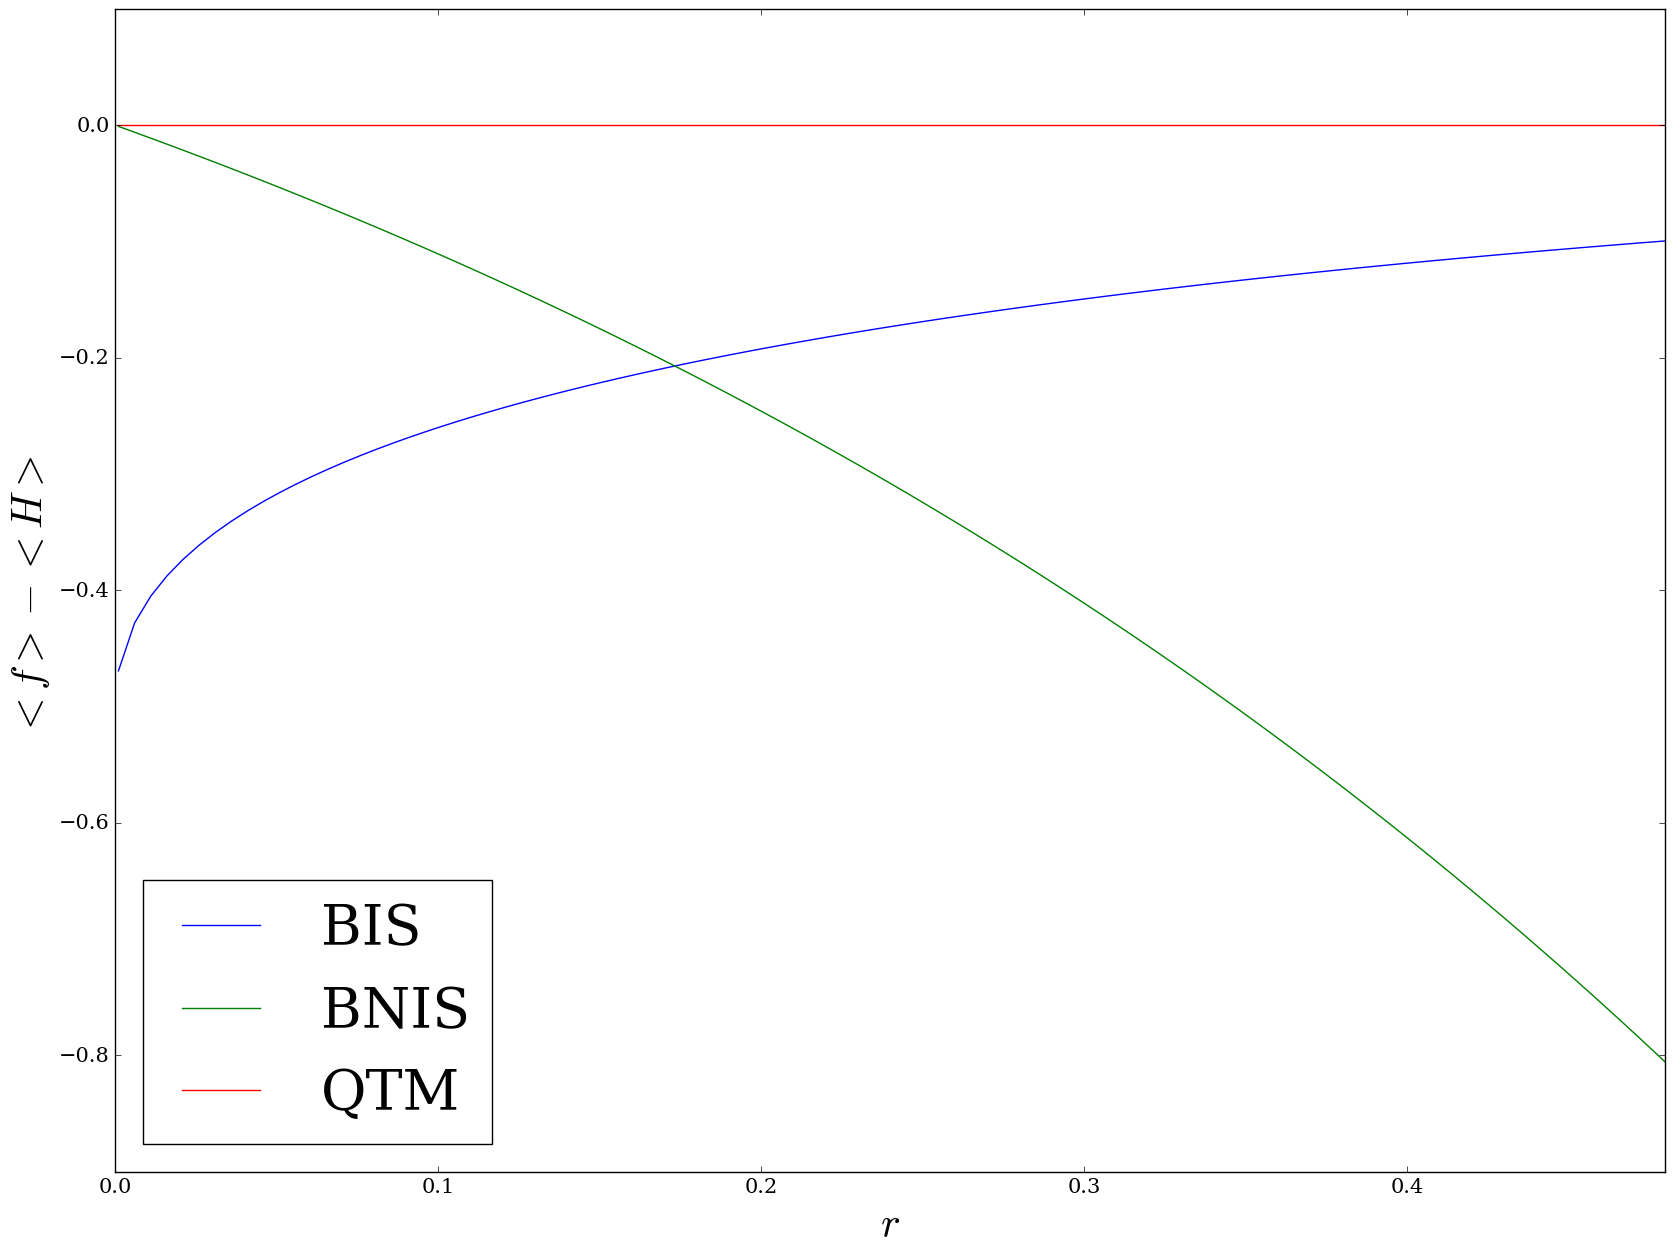

In [561]:
plt.figure(figsize=(20, 15))
#plt.suptitle('Comparing BIS, BNIS and QTM', fontsize=20)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)
plt.axis(xmax=0.48)
plt.xlabel('$r$', fontsize=30)
plt.ylabel('$<f>-<H>$ ', fontsize=30)
#plt.plot(r_list[0:n],bis[0:n],  label='BIS')
plt.plot(r_list[0:n],bis_tot[0:n],  label='BIS')
plt.plot(r_list[0:n],bnis_tot[0:n],  label='BNIS')
plt.plot(r_list[0:n],qtm_tot[0:n],  label='QTM')

plt.legend(loc='lower left', fontsize=40)
plt.show()

We indeed observe that the gaussian case saturates the inequality : $<f>-<H>=0$ for any value $r$ and we clearly observe the difference between classical and quantum bounds.